In [1]:
import pandas as pd
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
import numpy as np
from sklearn import tree
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
from time import time
from sklearn import svm
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import roc_curve, roc_auc_score, log_loss
from matplotlib import pyplot as plt
pd.options.mode.chained_assignment = None  # default='warn'

myparams = []

In [2]:
def preprocessdataframe (df):
    imputer = SimpleImputer(missing_values = np.nan, strategy = 'mean')
    imputer = imputer.fit(df.loc[:,['Age']])
    df.loc[:,'Age'] = imputer.transform(df.loc[:,['Age']])

    imputer = SimpleImputer(missing_values = np.nan, strategy = 'mean')
    imputer = imputer.fit(df.loc[:,['Fare']])
    df.loc[:,'Fare'] = imputer.transform(df.loc[:,['Fare']])

    df.Embarked = df.Embarked.fillna('S')

    df = pd.get_dummies(data=df, columns=['Embarked', 'Pclass', 'Sex'])

    return df

In [3]:
def showroccurve(fpr, tpr, roc_auc, label, color):
    plt.figure()
    lw = 2
    plt.plot(fpr, tpr, color=color,
             lw=lw, label='ROC curve - {0} (area = {1:0.2f})'.format(label, roc_auc))
    plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()

In [4]:
def showmultiroccurve(params): #this should be a list of dictionaries of fpr, tpr, roc_auc, label, and color
    plt.figure()
    lw = 2
    for param in params:
        plt.plot(param["fpr"], param["tpr"], color=param["color"],
             lw=lw, label='ROC curve - {0} (area = {1:0.2f})'.format(param["label"],param["roc_auc"]))
    plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()

In [5]:
df = pd.read_csv('~/Documents/GitHub/TiberDataScienceLearning/Data/Titanic/train.csv')
y = df[['Survived']]
x = df[['Pclass','Sex', 'Age', 'SibSp', 'Parch', 'Fare', 'Embarked']]

In [6]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 0)
x_train = preprocessdataframe(x_train)
x_test = preprocessdataframe(x_test)

Decision Tree - Using no hyperparameters: roc_auc =  0.7633069828722002
Decision Tree - Using no hyperparameters: log_loss =  7.340296323364496


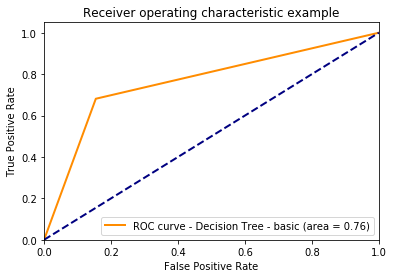

In [7]:
# basic decision tree with no hyperparameters
clf = tree.DecisionTreeClassifier()

model = clf.fit(x_train, y_train)
y_predictions = model.predict(x_test)
y_probabilities = model.predict_proba(x_test)
fpr, tpr, thresholds = roc_curve(y_test, y_predictions)
roc_auc = roc_auc_score(y_test, y_predictions)
log_loss_score = log_loss(y_test, y_probabilities)
label = 'Decision Tree - basic'
print("Decision Tree - Using no hyperparameters: roc_auc = ", roc_auc)
print("Decision Tree - Using no hyperparameters: log_loss = ", log_loss_score)
showroccurve(fpr, tpr, roc_auc, label, 'darkorange')

myparam = {'fpr': fpr, 'tpr': tpr, 'roc_auc': roc_auc, 'label': label, 'color': 'red'}
myparams.append(myparam)

Decision Tree - Using the best hyperparameters: roc_auc =  0.7805006587615284
Decision Tree - Using the best hyperparameters: log_loss =  0.7816967316729071


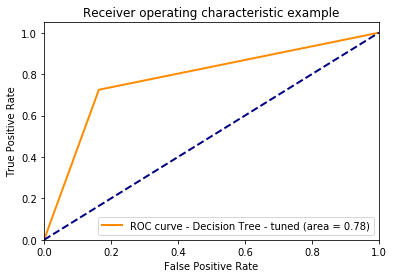

In [8]:
#these are the best decision tree hyperparaters that we found in "week 2"
clf = tree.DecisionTreeClassifier(max_depth= 10, max_features = 6, min_impurity_decrease = 0.0001, min_samples_leaf = 0.01, min_samples_split = 0.1)

model = clf.fit(x_train, y_train)
y_predictions = model.predict(x_test)
y_probabilities = model.predict_proba(x_test)
fpr, tpr, thresholds = roc_curve(y_test, y_predictions)
roc_auc = roc_auc_score(y_test, y_predictions)
log_loss_score = log_loss(y_test, y_probabilities)
label = 'Decision Tree - tuned'
print("Decision Tree - Using the best hyperparameters: roc_auc = ", roc_auc)
print("Decision Tree - Using the best hyperparameters: log_loss = ", log_loss_score)
showroccurve(fpr, tpr, roc_auc, label, 'darkorange')

myparam = {'fpr': fpr, 'tpr': tpr, 'roc_auc': roc_auc, 'label': label, 'color': 'blue'}
myparams.append(myparam)

SVC: roc_auc =  0.6729249011857708
SVC: log_loss =  0.5161695815447187


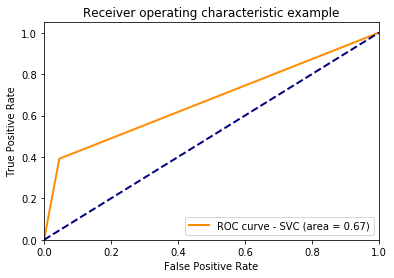

In [9]:
clf = svm.SVC(gamma='scale', probability=True)

model = clf.fit(x_train, y_train['Survived'])
y_predictions = model.predict(x_test)
y_probabilities = model.predict_proba(x_test)
fpr, tpr, thresholds = roc_curve(y_test, y_predictions)
roc_auc = roc_auc_score(y_test, y_predictions)
log_loss_score = log_loss(y_test, y_probabilities)
label = 'SVC'
print("SVC: roc_auc = ", roc_auc)
print("SVC: log_loss = ", log_loss_score)
showroccurve(fpr, tpr, roc_auc, label, 'darkorange') 

myparam = {'fpr': fpr, 'tpr': tpr, 'roc_auc': roc_auc, 'label': label, 'color': 'green'}
myparams.append(myparam)

Naive Bayes: roc_auc =  0.7958498023715415
Naive Bayes: log_loss_score =  0.686724718364607


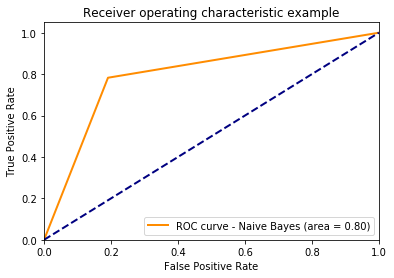

In [10]:

clf = GaussianNB()

model = clf.fit(x_train, y_train['Survived'])
y_predictions = model.predict(x_test)
y_probabilities = model.predict_proba(x_test)
fpr, tpr, thresholds = roc_curve(y_test, y_predictions)
roc_auc = roc_auc_score(y_test, y_predictions)
log_loss_score = log_loss(y_test, y_probabilities)
label = 'Naive Bayes'
print("Naive Bayes: roc_auc = ", roc_auc)
print("Naive Bayes: log_loss_score = ", log_loss_score)
showroccurve(fpr, tpr, roc_auc, label, 'darkorange') 

myparam = {'fpr': fpr, 'tpr': tpr, 'roc_auc': roc_auc, 'label': label, 'color': 'orange'}
myparams.append(myparam)



K Nearest Neighbors - 7: roc_auc =  0.7316205533596838
K Nearest Neighbors - 7: log_loss_score =  1.5854691398750025


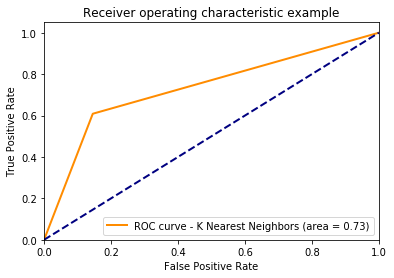

In [11]:
#I did a quick test to see which value of n seemed better
clf = KNeighborsClassifier(n_neighbors=7)

model = clf.fit(x_train, y_train['Survived'])
y_predictions = model.predict(x_test)
y_probabilities = model.predict_proba(x_test)
fpr, tpr, thresholds = roc_curve(y_test, y_predictions)
roc_auc = roc_auc_score(y_test, y_predictions)
log_loss_score = log_loss(y_test, y_probabilities)
label = 'K Nearest Neighbors'
print("K Nearest Neighbors - 7: roc_auc = ", roc_auc)
print("K Nearest Neighbors - 7: log_loss_score = ", log_loss_score)
showroccurve(fpr, tpr, roc_auc, label, 'darkorange') 

myparam = {'fpr': fpr, 'tpr': tpr, 'roc_auc': roc_auc, 'label': label, 'color': 'black'}
myparams.append(myparam)

Random Forest: roc_auc =  0.8232542819499342
Random Forest: log_loss_score =  0.39259640771298493


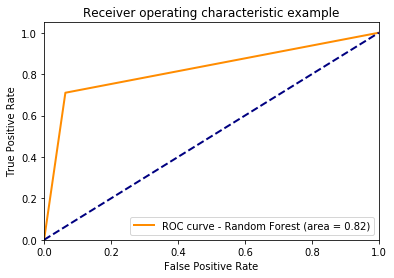

In [12]:
clf = RandomForestClassifier(n_estimators=100, max_depth=10,
                              random_state=0)

model = clf.fit(x_train, y_train['Survived'])
y_predictions = model.predict(x_test)
y_probabilities = model.predict_proba(x_test)
fpr, tpr, thresholds = roc_curve(y_test, y_predictions)
roc_auc = roc_auc_score(y_test, y_predictions)
log_loss_score = log_loss(y_test, y_probabilities)
label = 'Random Forest'
print("Random Forest: roc_auc = ", roc_auc)
print("Random Forest: log_loss_score = ", log_loss_score)
showroccurve(fpr, tpr, roc_auc, label, 'darkorange') 

myparam = {'fpr': fpr, 'tpr': tpr, 'roc_auc': roc_auc, 'label': label, 'color': 'pink'}
myparams.append(myparam)

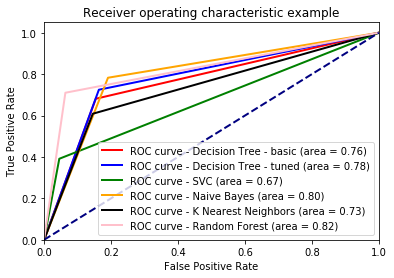

In [13]:
showmultiroccurve(myparams)